In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import sys
import os

In [2]:
directory_name = 'output'

In [3]:
stat_files = os.listdir(directory_name)
stat_files = [
    af for af in stat_files
    if af.endswith(".json")
]
stat_files[:4], len(stat_files)

(['elite_singlepoint_0_40_01.json',
  'elite_singlepoint_0_40_02.json',
  'elite_singlepoint_0_40_03.json',
  'elite_singlepoint_0_40_04.json'],
 600)

In [4]:
splited_stat_files = np.array([sf.split("_") for sf in stat_files])
splited_stat_files[:4]

array([['elite', 'singlepoint', '0', '40', '01.json'],
       ['elite', 'singlepoint', '0', '40', '02.json'],
       ['elite', 'singlepoint', '0', '40', '03.json'],
       ['elite', 'singlepoint', '0', '40', '04.json']], dtype='<U11')

In [5]:
selection_methods = np.unique(splited_stat_files[:,0])
selection_methods

array(['elite', 'ranking', 'roulette', 'tournament'], dtype='<U11')

In [6]:
crossover_methods = np.unique(splited_stat_files[:,1])
crossover_methods

array(['singlepoint', 'twopoint', 'uniform'], dtype='<U11')

In [7]:
selection_crossover_methods = list(itertools.product(selection_methods, crossover_methods))
selection_crossover_methods

[('elite', 'singlepoint'),
 ('elite', 'twopoint'),
 ('elite', 'uniform'),
 ('ranking', 'singlepoint'),
 ('ranking', 'twopoint'),
 ('ranking', 'uniform'),
 ('roulette', 'singlepoint'),
 ('roulette', 'twopoint'),
 ('roulette', 'uniform'),
 ('tournament', 'singlepoint'),
 ('tournament', 'twopoint'),
 ('tournament', 'uniform')]

In [8]:
categorized_paths = {sm:{cm:{} for cm in crossover_methods} for sm in selection_methods}
categorized_paths

{'elite': {'singlepoint': {}, 'twopoint': {}, 'uniform': {}},
 'ranking': {'singlepoint': {}, 'twopoint': {}, 'uniform': {}},
 'roulette': {'singlepoint': {}, 'twopoint': {}, 'uniform': {}},
 'tournament': {'singlepoint': {}, 'twopoint': {}, 'uniform': {}}}

In [9]:
for k_out, sm_val in categorized_paths.items():
    for k_in, filenames_dict in sm_val.items():
        filenames = [
            af for af in stat_files
            if k_out in af and k_in in af
        ]
        configs_numbers = np.unique([fn.split('_')[2] for fn in filenames])
        for conf_num in configs_numbers:
            filenames_dict[conf_num] = {}
            filenames_conf = [fn for fn in filenames if conf_num == fn.split('_')[2]]
            max_generations = np.unique([fn.split('_')[3] for fn in filenames_conf])
            for max_gen in max_generations:
                filenames_dict[conf_num][max_gen] = [fn for fn in filenames_conf if max_gen == fn.split('_')[3]]
categorized_paths

{'elite': {'singlepoint': {'0': {'40': ['elite_singlepoint_0_40_01.json',
     'elite_singlepoint_0_40_02.json',
     'elite_singlepoint_0_40_03.json',
     'elite_singlepoint_0_40_04.json',
     'elite_singlepoint_0_40_05.json']},
   '1': {'40': ['elite_singlepoint_1_40_01.json',
     'elite_singlepoint_1_40_02.json',
     'elite_singlepoint_1_40_03.json',
     'elite_singlepoint_1_40_04.json',
     'elite_singlepoint_1_40_05.json']},
   '2': {'40': ['elite_singlepoint_2_40_01.json',
     'elite_singlepoint_2_40_02.json',
     'elite_singlepoint_2_40_03.json',
     'elite_singlepoint_2_40_04.json',
     'elite_singlepoint_2_40_05.json']},
   '3': {'40': ['elite_singlepoint_3_40_01.json',
     'elite_singlepoint_3_40_02.json',
     'elite_singlepoint_3_40_03.json',
     'elite_singlepoint_3_40_04.json',
     'elite_singlepoint_3_40_05.json']},
   '4': {'40': ['elite_singlepoint_4_40_01.json',
     'elite_singlepoint_4_40_02.json',
     'elite_singlepoint_4_40_03.json',
     'elite_sing

In [10]:
def getListFromPath(fp):
    return [row[0] for row in pd.read_json(fp, orient='index').T.to_dict().values()]

In [11]:
def next_alpha(s):
    return chr((ord(s.upper())+1 - 65) % 26 + 65)

In [12]:
def extract_data(filename_arr):
    fs_path = [os.path.join(directory_name, fn) for fn in filename_arr]
    clmns = pd.read_json(fs_path[0]).columns
    full_configuration_df = pd.DataFrame([getListFromPath(fp) for fp in fs_path], columns=clmns)
    return full_configuration_df

In [13]:
def create_stats(filename_arr, selection_method, crossover_method, config_id, max_generations):
    full_configuration_df = extract_data(filename_arr)
    crossover_probability = full_configuration_df.loc[0]['crossover_probability']
    mutation_probability = full_configuration_df.loc[0]['mutation_probability']
    population_size = full_configuration_df.loc[0]['population_size']
    return {
        'df' : full_configuration_df,
        'select_method': selection_method,
        'cross_method': crossover_method,
        'max_gens': max_generations,
        'cross_prob': crossover_probability,
        'mut_prob': mutation_probability,
        "config_id": config_id,
        'pop_size': population_size
    }

In [38]:
def show_graph(chosen_config_id):
    fig, ax = plt.subplots(6, 2)
    ax_flat = ax.flatten()
    
    chosen_config = [
        gi for gi in graph_info
        if gi['config_id'] == chosen_config_id
    ]
    
    stats_conf = []
    maximusy[chosen_config_id] = {}
    prefix = 'A'
    
    for a, params in zip(ax_flat, chosen_config):
        maxi_dict = maximusy[chosen_config_id]
        offset = 2
        glob_max = 0
        glob_min = max(params['df'].iloc[0]['max_value_per_iteration'])
        glob_mean = 0
        max_generations = params['max_gens']
        crossover_method = params['cross_method']
        selection_method = params['select_method']
        crossover_probability = round(params['cross_prob'], 3)
        mutation_probability = round(params['mut_prob'], 3)
        population_size = params['pop_size']

        def get_key():
            return f"{crossover_method}_{selection_method}"

        max_key = get_key()
        maxi_dict[max_key] = 0

        for df_row in params['df'].iloc:
            list_data = df_row['max_value_per_iteration']
            glob_max = max(list_data) if max(list_data)>glob_max else glob_max
            glob_min = max(list_data) if max(list_data)<glob_min else glob_min
            glob_mean += max(list_data)
            a.plot(list_data, label=df_row['repetition'])
            maxi_dict[max_key] = glob_max if glob_max>maxi_dict[max_key] else maxi_dict[max_key]
            how_many_empty = max_generations - len(list_data) + 1
            x_points = np.linspace(len(list_data)-1, max_generations, how_many_empty*offset)
            y_points = [list_data[-1]] * len(x_points)
            a.scatter(x_points, y_points, s=3)
        glob_mean /= df_row['repetition']
        
        title = f'{prefix}. {selection_method} {crossover_method} C{crossover_probability} M{mutation_probability} P{population_size}'
        prefix = next_alpha(prefix)
        annot = f'max:{glob_max} avg:{round(glob_mean)} min:{glob_min}'
        a.set_title(annot, pad=8, loc='right', fontsize = 10)
        a.set_xlabel('Iteration')
        a.set_ylabel('Value')
        a.legend(framealpha=0.7, title="Simulation ID", loc='lower right')
        min_ylim, max_ylim = a.get_ylim()
        min_xlim, max_xlim = a.get_xlim()
        # a.annotate(annot, xy=(20, 20), xytext=(max_xlim/2 - 0.2 * len(annot), min_ylim-2800000))
        a.text(1/2, 1.145, title.title(), style ='italic', horizontalalignment='center',
         verticalalignment='center', fontsize = 15, color ="green", transform=a.transAxes)
        
        a.text(1, (glob_max-min_ylim)/(max_ylim-min_ylim), "<- max", style ='italic', horizontalalignment='left',
         verticalalignment='center', fontsize = 9, color ="black", transform=a.transAxes)
        
        a.text(1, (glob_mean-min_ylim)/(max_ylim-min_ylim), "<- avg", style ='italic', horizontalalignment='left',
         verticalalignment='center', fontsize = 9, color ="black", transform=a.transAxes)
        
        a.text(1, (glob_min-min_ylim)/(max_ylim-min_ylim), "<- min", style ='italic', horizontalalignment='left',
         verticalalignment='center', fontsize = 9, color ="black", transform=a.transAxes)
        
        
        stats_conf.append([glob_max, glob_mean, glob_min, params])
        
        a.set_xlim([0, max_generations])
        a.set_xticks(list(range(0, max_generations+1, 2)))

    # Popraw rozmiar i pozycję wykresów
    fig.set_size_inches(16, 26)
    plt.subplots_adjust(left=0.1, 
                        bottom=0.1,  
                        right=0.9,  
                        top=0.9,  
                        wspace=0.3,  
                        hspace=0.45) 
    return stats_conf

In [15]:
maximusy = {}
graph_info = []
for sel, cro in selection_crossover_methods:
    keys_conf = categorized_paths[sel][cro].keys()
    for k_c in keys_conf:
        file_depth_dict = categorized_paths[sel][cro][k_c]
        for k, v in file_depth_dict.items():
            graph_info.append(create_stats(v, sel, cro, int(k_c), int(k)))

## GRAPH GENERATION PLAYGROUND: 

In [49]:
unique_config_id = np.unique([
    gi['config_id'] for gi in graph_info
])
unique_config_id

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
config_id_iter = iter(unique_config_id)

In [18]:
# Run me to change me
try:
    chosen_config_id = next(config_id_iter)
except:
    print(sys.exc_info()[0])
    print("Refresh")
    config_id_iter = iter(unique_config_id)
    chosen_config_id = next(config_id_iter)
chosen_config_id

0

In [19]:
# Or Type your choice
chosen_config_id = 3

In [20]:
# DON'T FORGET ABOUT ME
chosen_config = [
    gi for gi in graph_info
    if gi['config_id'] == chosen_config_id
]

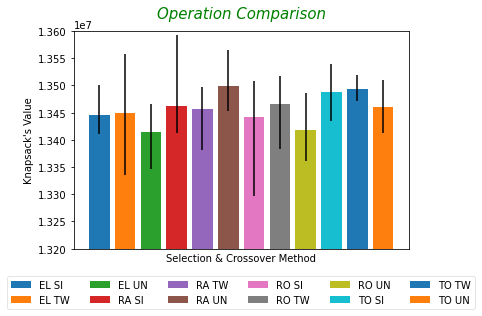

In [145]:
y_min, y_max = 1.32, 1.36
make_chart_by_strat(stats_sg, y_min, y_max)

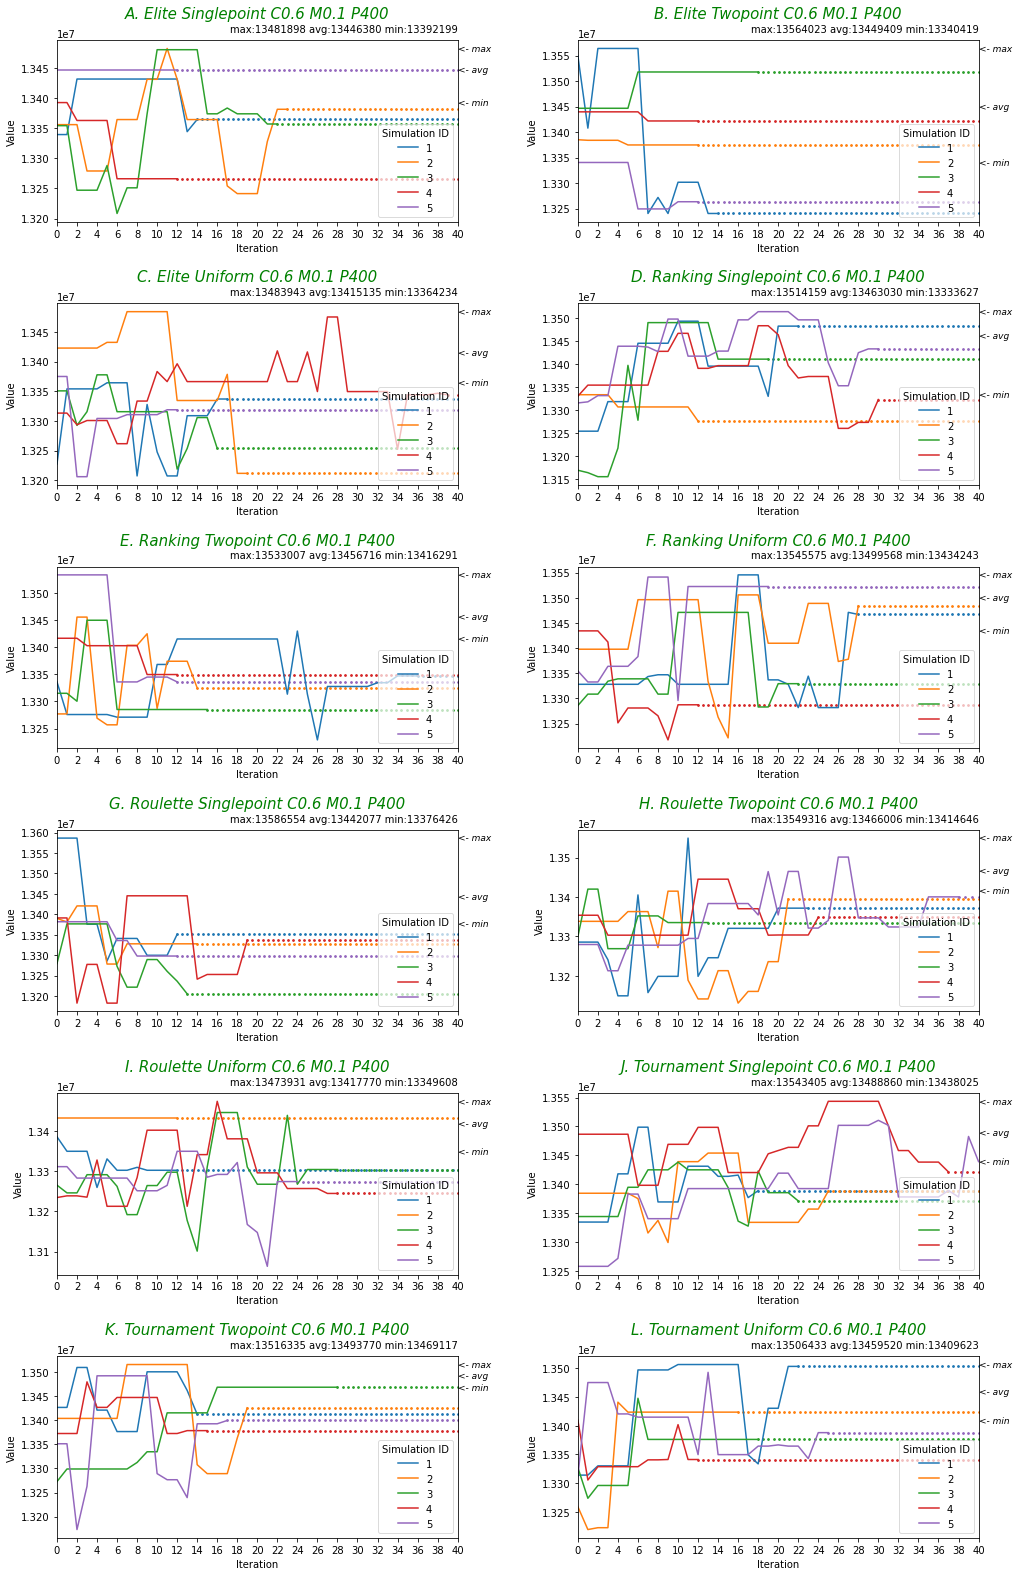

In [144]:
stats_sg = show_graph(9)

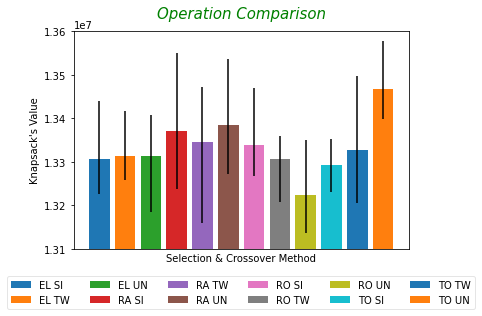

In [83]:
y_min, y_max = 1.31, 1.36
make_chart_by_strat(stats_sg, y_min, y_max)

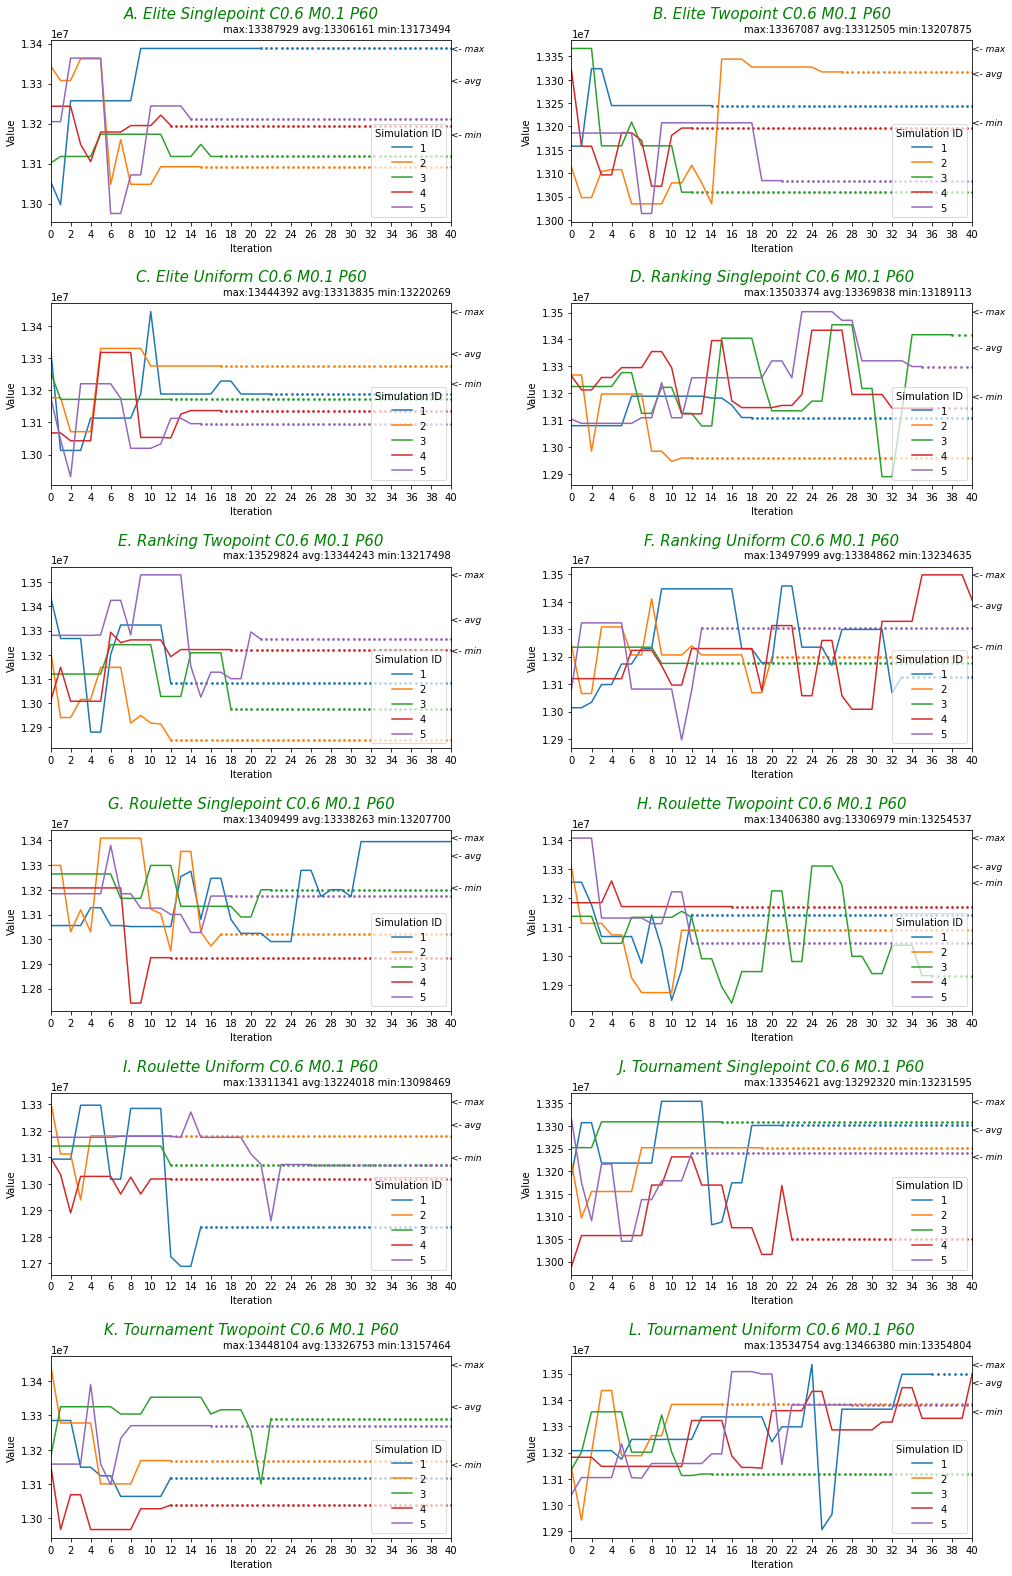

In [45]:
stats_sg1 = show_graph(1)

In [44]:
stats_sg1

[[13477035,
  13337411.6,
  13258421,
  {'df':    crossover_probability  mutation_probability  population_size  \
   0                    0.6                   0.1               60   
   1                    0.6                   0.1               60   
   2                    0.6                   0.1               60   
   3                    0.6                   0.1               60   
   4                    0.6                   0.1               60   
   
      max_generations selection_method crossover_method  parameters_index  \
   0               40            elite      singlepoint                 1   
   1               40            elite      singlepoint                 1   
   2               40            elite      singlepoint                 1   
   3               40            elite      singlepoint                 1   
   4               40            elite      singlepoint                 1   
   
      repetition  duration_time_ms  \
   0           1           1

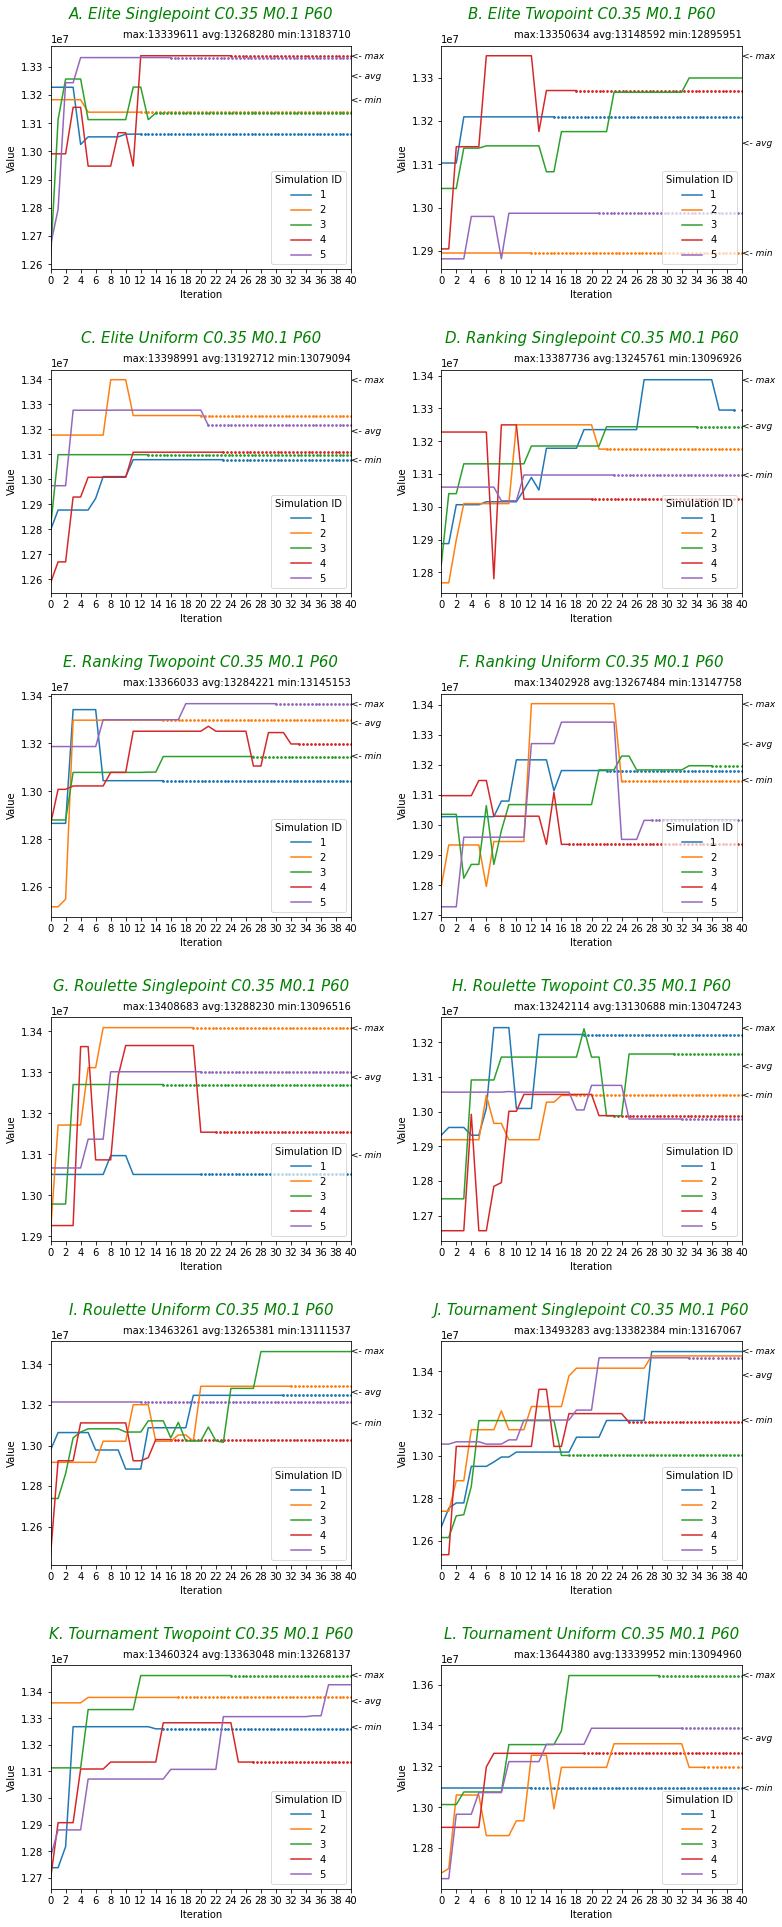

In [45]:
stats_sg2 = show_graph(2)

In [46]:
stats_sg2

[[13339611,
  13268279.6,
  13183710,
  {'df':    crossover_probability  mutation_probability  population_size  \
   0                   0.35                   0.1               60   
   1                   0.35                   0.1               60   
   2                   0.35                   0.1               60   
   3                   0.35                   0.1               60   
   4                   0.35                   0.1               60   
   
      max_generations selection_method crossover_method  parameters_index  \
   0               40            elite      singlepoint                 2   
   1               40            elite      singlepoint                 2   
   2               40            elite      singlepoint                 2   
   3               40            elite      singlepoint                 2   
   4               40            elite      singlepoint                 2   
   
      repetition  duration_time_ms  \
   0           1            

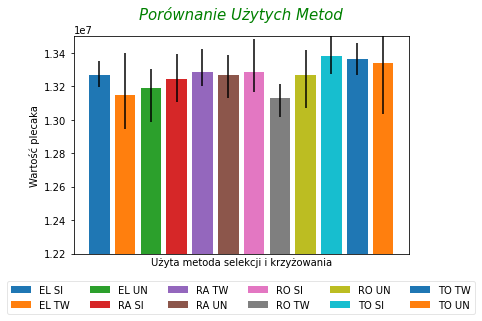

In [47]:
y_min, y_max = 1.22, 1.35
make_chart_by_strat(stats_sg2, y_min, y_max)

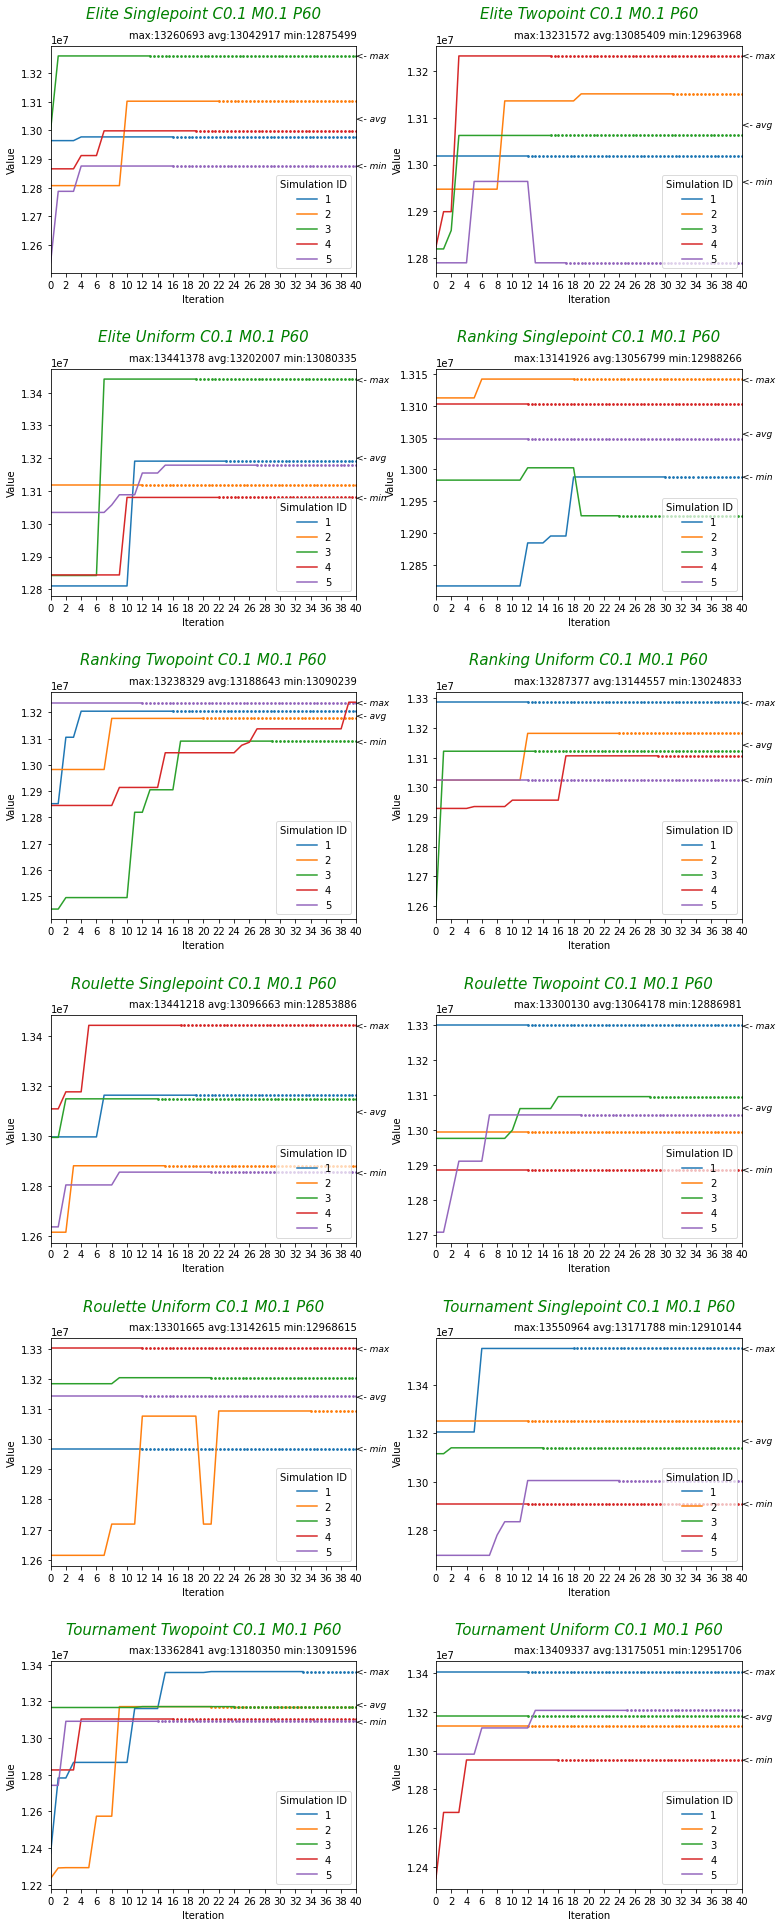

In [19]:
stats_sg3 = show_graph(3)

In [20]:
stats_sg3

[[13260693,
  13042916.8,
  12875499,
  {'df':    crossover_probability  mutation_probability  population_size  \
   0                    0.1                   0.1               60   
   1                    0.1                   0.1               60   
   2                    0.1                   0.1               60   
   3                    0.1                   0.1               60   
   4                    0.1                   0.1               60   
   
      max_generations selection_method crossover_method  parameters_index  \
   0               40            elite      singlepoint                 3   
   1               40            elite      singlepoint                 3   
   2               40            elite      singlepoint                 3   
   3               40            elite      singlepoint                 3   
   4               40            elite      singlepoint                 3   
   
      repetition  duration_time_ms  \
   0           1            

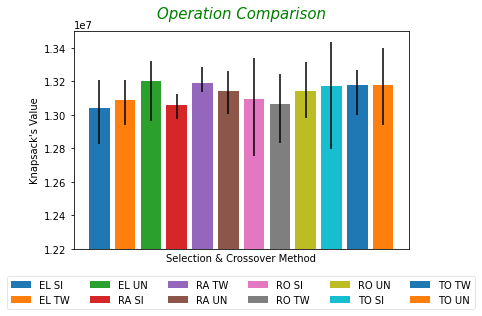

In [59]:
y_min, y_max = 1.22, 1.35
make_chart_by_strat(stats_sg3, y_min, y_max)

In [23]:
def make_chart_by_strat(stats, y_min, y_max):
    stats = np.array(stats)
    stats, param = stats[:, :-1], stats[:, -1]
    
    labels = [
        f"{p['select_method'][:2]} {p['cross_method'][:2]}".upper()
        for p in param
    ]
    barWidth = 4 / (len(stats)+1)
    start = np.array(range(0,len(stats[0]))) * 4 + 0.5
    brs = [start + barWidth*i for i in range(1, len(stats)+1)]
    
    fig, ax = plt.subplots()
    #for stat_arr, br, l in zip(stats, brs, labels):
    for i in range(len(stats)):
        ax.bar(i+1, stats[i][1], yerr=[[stats[i][0]-stats[i][1]], [stats[i][1]-stats[i][2]]], label=labels[i])
        
    ax.set_ylim([y_min * 10**7, y_max * 10**7])
    ax.legend(framealpha=0.5, loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.3, 0, 0))
    ax.set_xlabel("Selection & Crossover Method")
    ax.set_ylabel("Knapsack's Value")
    ax.set_xticks([])
    title = "Operation Comparison"
    ax.text(1/2, 1.08, title.title(), style ='italic', horizontalalignment='center',
     verticalalignment='center', fontsize = 15, color ="green", transform=ax.transAxes)

In [694]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:
    
   

In [679]:
maximusy

{0: {'singlepoint_elite': 12398208,
  'twolepoint_elite': 12398208,
  'uniform_elite': 12398208,
  'singlepoint_ranking': 12398208,
  'twolepoint_ranking': 12398208,
  'uniform_ranking': 12398208,
  'singlepoint_roulette': 12398208,
  'twolepoint_roulette': 12398208,
  'uniform_roulette': 12398208,
  'singlepoint_tournament': 12398208,
  'twolepoint_tournament': 12398208,
  'uniform_tournament': 12398208},
 1: {'singlepoint_elite': 12398208,
  'twolepoint_elite': 12398208,
  'uniform_elite': 12398208,
  'singlepoint_ranking': 12398208,
  'twolepoint_ranking': 12398208,
  'uniform_ranking': 12398208,
  'singlepoint_roulette': 12398208,
  'twolepoint_roulette': 12398208,
  'uniform_roulette': 12398208,
  'singlepoint_tournament': 12398208,
  'twolepoint_tournament': 12398208,
  'uniform_tournament': 12398208},
 2: {'singlepoint_elite': 12398208,
  'twolepoint_elite': 12398208,
  'uniform_elite': 12398208,
  'singlepoint_ranking': 12398208,
  'twolepoint_ranking': 12398208,
  'uniform_ran

In [680]:
max_per_conf = {conf_id:max(maximus_configus.values()) for conf_id, maximus_configus in maximusy.items()}
sorted_mpc = {}
for val in sorted(max_per_conf.values(), reverse=True):
    idx = list(max_per_conf.values()).index(val)
    sorted_mpc[idx] = val

sorted_mpc

{0: 12398208}